## Introduction

We want to analyse loans in order to predict likelihood of default.

You will try to use:
* <strong>Decision trees</strong>
* <strong>Random forests</strong>
* <strong>Neural networks</strong>

Try to adapt the models in order to improve how well they predict Default. Use the MSE in order to assess performance.

First, load the libraries and data that we will use.

In [1]:
# Fix plot size
options(repr.plot.width=5, repr.plot.height=5)

library(randomForest) #rf
library(neuralnet) #nn 
library(MASS) 
library(rpart) #decision tree
library(e1071) #svm

scaled = read.csv("output_scaled_sample_data.csv",head=T) #scaled data set

# keep a small chunk of the data so that the notebook can handle it
scaled = scaled[1:1000,]

index = sample(1:nrow(scaled),round(0.75*nrow(scaled))) #select the rows for the training set

# Split the data into a training set and a test set
train_ = scaled[index,]
test_ = scaled[-index,]

# Attach the data so we can refer to the column names
attach(train_)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


Before doing any analysis, take a quick peak at what's in the data:

In [2]:
head(train_)

,Age,Gender,CarValue,CustomerIncome,InterestRate,LoanAmount,LoanToCarRatio,Default,NumberPaymentsLeft,OutstandingAmount
973,0.30000000,0,0.010948905,1.08e-06,0.4092141,0.004003728,0.2423127,0,0.6101695,0.006644332
363,0.58571429,0,0.009732360,1.71e-06,0.3658537,0.008163507,0.5087662,0,0.6779661,0.015118043
875,0.44285714,1,0.020686131,2.52e-06,0.4010840,0.019280975,0.5905075,0,0.7627119,0.030190170
720,0.20000000,1,0.009124088,2.16e-06,0.4363144,0.008173549,0.5375468,0,0.3050847,0.008719720
346,0.08571429,1,0.012773723,1.71e-06,0.4254743,0.008504147,0.4149767,0,0.7627119,0.018445568
37,0.11428571,1,0.009732360,1.62e-06,0.4444444,0.008605860,0.5339556,0,0.7796610,0.019210675


## Decision Trees

The input parameters are:

* `minsplit`: minimum number of observations for a split to happen *cp: a split must decrease the overall lack of fit by a factor of 0.001 (cost complexity factor) before being attempted
* `method` is "class" for classification and "anova" for regression

See if by changing the input parameters below you can improve the MSE.

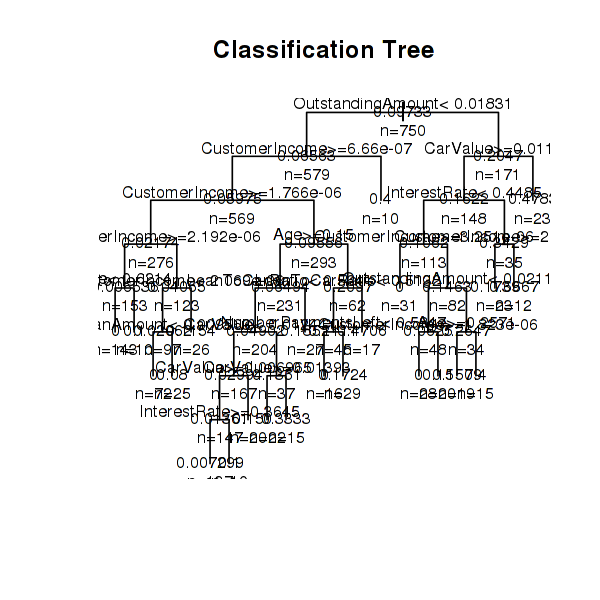

The MSE for this decision tree is  0.1225115 


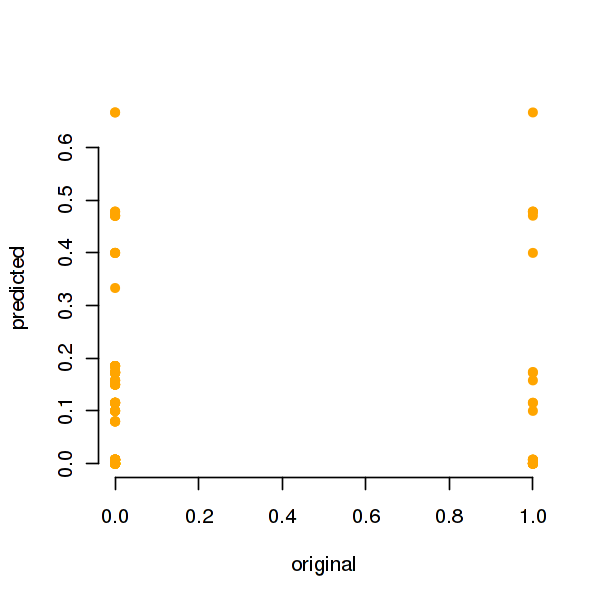

In [3]:
minsplit = 30
cp = 0.001
method = "anova"

output.decisionTree = rpart(Default~., data=train_,control=rpart.control(minsplit=minsplit, cp=cp),method=method)

plot(output.decisionTree, uniform=TRUE, main="Classification Tree")
text(output.decisionTree, use.n=TRUE, all=TRUE, cex=.8)

# # variable importance
# summary(output.decisionTree)

# predictions on new data
predictions = predict(output.decisionTree, test_)

# asseessment
plot(test_$Default, predictions, xlab="original",ylab="predicted",bty="n",pch=16, col="orange")
MSE = sum((predictions - test_$Default)^2)/nrow(test_)
cat("The MSE for this decision tree is ", MSE, "\n")


## RANDOM FOREST

The input parameters are:

* `ntree`: Number of trees to grow.
* `nodesize`: Minimum size of terminal nodes.

See if by changing the input parameters below you can improve the MSE.

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

                   IncNodePurity
Age                    8.6303364
Gender                 0.8152487
CarValue               7.8667231
CustomerIncome         8.7626564
InterestRate           5.8222924
LoanAmount             6.0671894
LoanToCarRatio         7.8230706
NumberPaymentsLeft     8.3818358
OutstandingAmount      9.1534471
The MSE for this random forest is:  0.1166878 


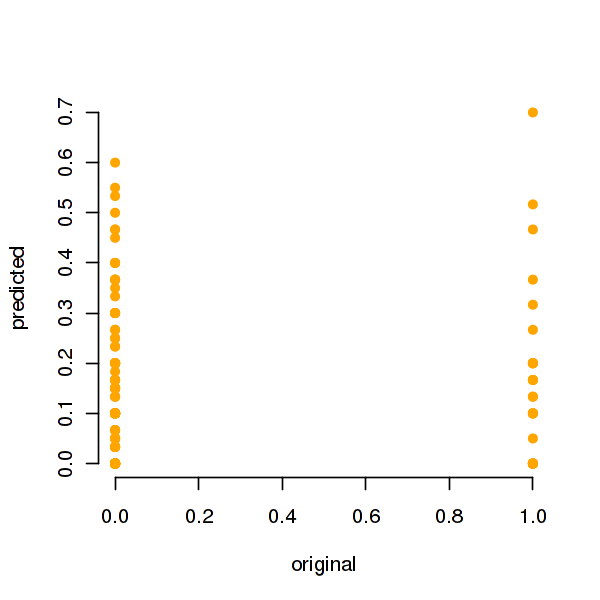

In [4]:
#load the relevant library
library(randomForest)

ntree = 10
nodesize = 3

output.forest = randomForest(Default ~ ., data = train_, ntree=ntree, nodesize = nodesize)
# variable importance
print(importance(output.forest,type = 2)) 

# predictions on new data
predictions = predict(output.forest, test_)

# asseessment
plot(test_$Default, predictions, xlab="original",ylab="predicted",bty="n",pch=16, col="orange");
MSE = sum((predictions - test_$Default)^2)/nrow(test_)
cat("The MSE for this random forest is: ",MSE,"\n")

## NEURAL NETWORK

The input parameters are:

* `hidden` in the form of c(n,m) for n neurons for each of m hidden layers
* `rep` the number of repetitions for the neural network’s training.

See if by changing the input parameters below you can improve the MSE.

The MSE for the NN is:  0.1223139035 


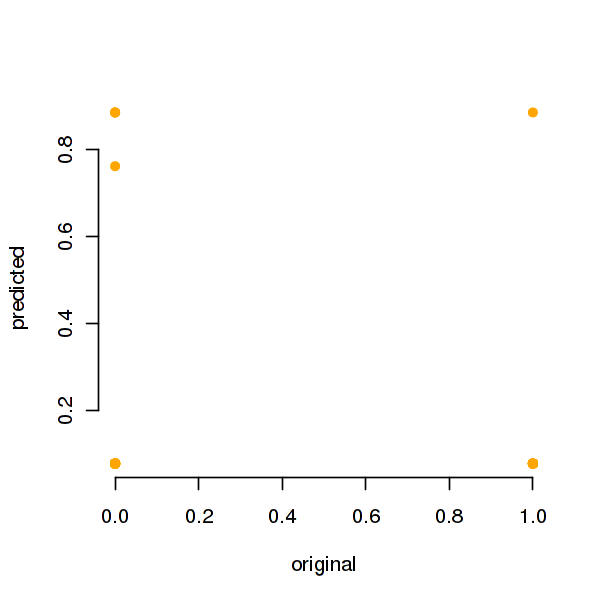

In [7]:
hidden = c(2,1) # start small; you might be dealing with a bigger data set than you think
rep = 1

n = names(train_)
f = as.formula(paste("Default ~", paste(n[!n %in% "Default"], collapse = " + ")))
output.nn = neuralnet(f,data=train_,hidden=hidden,linear.output=T,rep=rep) 

# predictions on new data
predictions = compute(output.nn, test_[,c(1:7,9:10)])$net.result

# asseessment
plot(test_$Default, predictions, xlab="original",ylab="predicted",bty="n",pch=16, col="orange");
MSE = sum((predictions - test_$Default)^2)/nrow(test_)
cat("The MSE for the NN is: ",MSE,"\n")